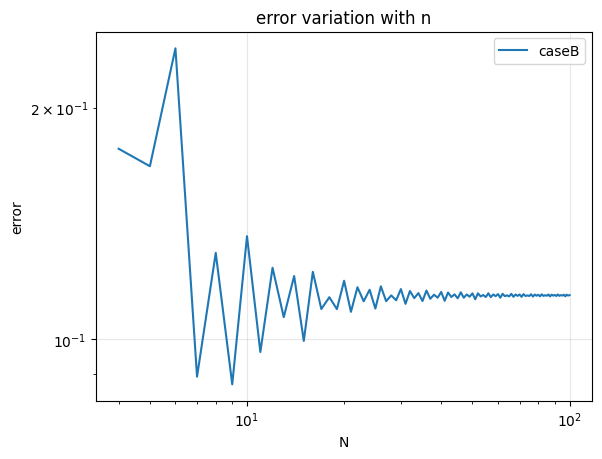

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def diffcheb(n, xspan):
    x = -np.cos(np.arange(n + 1) * np.pi / n)
    c = np.hstack([2.0, np.ones(n - 1), 2.0])

    Dx = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(n + 1):
            if i != j:
                Dx[i, j] = (-1) ** (i + j) * c[i] / (c[j] * (x[i] - x[j]))

    for i in range(n + 1):
        Dx[i, i] = -np.sum([Dx[i, j] for j in range(n + 1) if j != i])

    a, b = xspan
    x = a + (b - a) * (x + 1) / 2
    Dx = 2 * Dx / (b - a)

    Dxx = Dx @ Dx

    return x, Dx, Dxx

def bvplin(p, q, r, xspan, lval, rval, n):

    x, Dx, Dxx = diffcheb(n, xspan)

    P = np.diag(p(x))
    Q = np.diag(q(x))
    L = -(Dxx + P @ Dx + Q)

    I = np.eye(n + 1)
    A = np.vstack([I[0], L[1:-1], I[-1]])
    b = np.hstack([lval, r(x[1:-1]), rval])

    u = np.linalg.solve(A, b)

    return x, u

k = 2
u_exact_A = lambda x: np.sin(k * np.pi * x)
u_exact_B = lambda x: (1 - x**2)**3 * abs(x)**3
xspan = [-1, 1]

N = np.arange(4, 101)
lval = 0
rval = 0
p_func = lambda x: np.zeros_like(x)
q_func = lambda x: np.zeros_like(x)
rA = lambda x: k**2 * np.pi**2 * np.sin(k * np.pi * x)
rB = lambda x: (6 * abs(x) - 60 * abs(x)**3 + 126 * abs(x)**5 - 72 * abs(x)**7)


errA = []
errB = []
for n in N:
    x_caseA, u_caseA = bvplin(p_func, q_func, rA, xspan, lval, rval, n)
    x_caseB, u_caseB = bvplin(p_func, q_func, rB, xspan, lval, rval, n)

    errA.append(max(abs(u_caseA - u_exact_A(x_caseA))))
    errB.append(max(abs(u_caseB - u_exact_B(x_caseB))))



#plt.loglog(N, errA, label='caseA')
plt.loglog(N, errB, label='caseB')
plt.legend()
plt.xlabel("N"), plt.ylabel("error")
plt.title("error variation with n")
plt.grid(True, alpha=0.3)



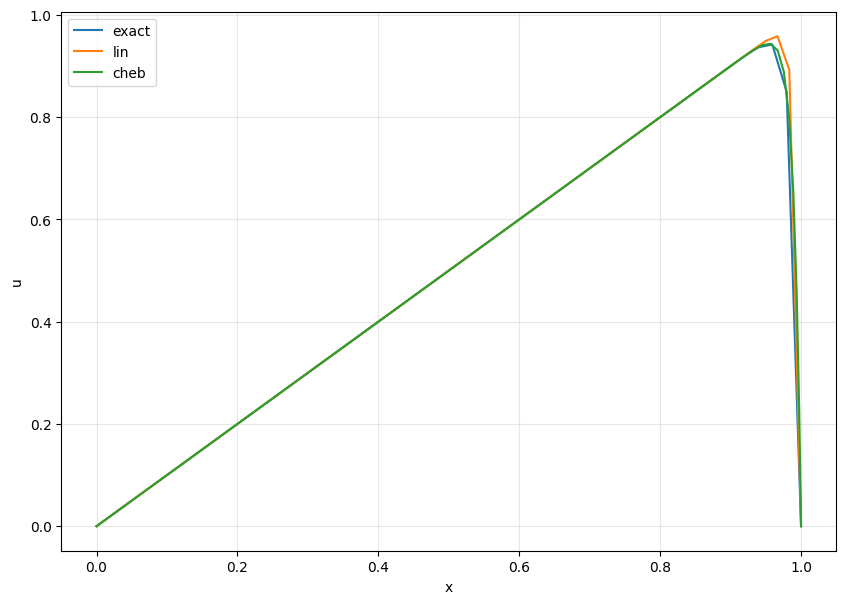

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def diffmat2(n, xspan):
    a, b = xspan
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # nodes

    # Define most of Dx by its diagonals.
    dp = 0.5 / h * np.ones(n)  # superdiagonal
    dm = -0.5 / h * np.ones(n)  # subdiagonal
    Dx = np.diag(dm, -1) + np.diag(dp, 1)

    # Fix first and last rows.
    Dx[0, :3] = np.array([-1.5, 2, -0.5]) / h
    Dx[-1, -3:] = np.array([0.5, -2, 1.5]) / h

    # Define most of Dxx by its diagonals.
    d0 = -2 / h**2 * np.ones(n + 1)  # main diagonal
    dp = np.ones(n) / h**2  # superdiagonal and subdiagonal
    Dxx = np.diag(d0, 0) + np.diag(dp, -1) + np.diag(dp, 1)

    # Fix first and last rows.
    Dxx[0, :4] = np.array([2, -5, 4, -1]) / h**2
    Dxx[-1, -4:] = np.array([-1, 4, -5, 2]) / h**2

    return x, Dx, Dxx

def diffcheb(n, xspan):
    x = -np.cos(np.arange(n + 1) * np.pi / n)
    c = np.hstack([2.0, np.ones(n - 1), 2.0])

    Dx = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(n + 1):
            if i != j:
                Dx[i, j] = (-1) ** (i + j) * c[i] / (c[j] * (x[i] - x[j]))

    for i in range(n + 1):
        Dx[i, i] = -np.sum([Dx[i, j] for j in range(n + 1) if j != i])

    a, b = xspan
    x = a + (b - a) * (x + 1) / 2
    Dx = 2 * Dx / (b - a)

    Dxx = Dx @ Dx

    return x, Dx, Dxx

def bvplin(p, q, r, xspan, lval, rval, n):

    x, Dx, Dxx = diffmat2(n, xspan)

    P = np.diag(p(x))
    Q = np.diag(q(x))
    L = Dxx + P @ Dx + Q

    I = np.eye(n + 1)
    A = np.vstack([I[0], L[1:-1], I[-1]])
    b = np.hstack([lval, r(x[1:-1]), rval])

    u = np.linalg.solve(A, b)

    return x, u

def bvpcheb(p, q, r, xspan, lval, rval, n):

    x, Dx, Dxx = diffcheb(n, xspan)

    P = np.diag(p(x))
    Q = np.diag(q(x))
    L = Dxx + P @ Dx + Q

    I = np.eye(n + 1)
    A = np.vstack([I[0], L[1:-1], I[-1]])
    b = np.hstack([lval, r(x[1:-1]), rval])

    u = np.linalg.solve(A, b)

    return x, u

epsilon = 0.01
u_exact = lambda x: x - (np.exp((x-1)/epsilon) - np.exp(-1/epsilon)) / (1 - np.exp(-1/epsilon))
p = lambda x: -np.ones_like(x) / epsilon
q = lambda x: np.zeros_like(x)
r = lambda x: -np.ones_like(x) / epsilon
xspan = [0, 1]
lval = 0
rval = 0
n = 60
xx = np.linspace(0, 1, 50)
x_lin, u_lin = bvplin(p, q, r, xspan, lval, rval, n)
x_cheb, u_cheb = bvpcheb(p, q, r, xspan, lval, rval, n)

plt.figure(figsize=[10, 7])
plt.plot(xx, u_exact(xx), label='exact')
plt.plot(x_lin, u_lin, label='lin')
plt.plot(x_cheb, u_cheb, label='cheb')
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True, alpha=0.3)